In [694]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib

### Data Exploration

In [695]:
file_path = ["Data Set/ARUNACHAL_PRADESH.csv","Data Set/ASSAM.csv","Data Set/BIHAR.csv","Data Set/DELHI.csv","Data Set/GOA.csv","Data Set/GUJARAT.csv",
             "Data Set/HIMACHAL_PRADESH.csv","Data Set/JHARKHAND.csv","Data Set/KARNATAKA.csv","Data Set/KERALA.csv","Data Set/MAHARASHTRA.csv",
             "Data Set/MANIPUR.csv","Data Set/MIZORAM.csv","Data Set/NAGALAND.csv","Data Set/ODISHA.csv","Data Set/PUDUCHERRY.csv","Data Set/RAJASTHAN.csv",
             "Data Set/SIKKIM.csv","Data Set/TAMIL_NADU.csv","Data Set/TRIPURA.csv","Data Set/UTTAR_PRADESH.csv","Data Set/UTTARAKHAND.csv","Data Set/WEST_BENGAL.csv"
             ]

In [696]:
dataframes = [pd.read_csv(file, encoding='latin1') for file in file_path]
df = pd.concat(dataframes, ignore_index=True)
df.head(2)

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`12,`000,STATE - ARUNACHAL PRADESH,`00,`000,`0000,Total,211353,160166,51187,...,22132,38415,19776,18639,24581,12610,11971,13834,7166,6668
1,`12,`000,STATE - ARUNACHAL PRADESH,`01,`000,`0000,"Crop and animal production, hunting and relate...",12967,8180,4787,...,736,2975,1211,1764,2545,1004,1541,430,207,223


In [697]:
df.columns = df.columns.str.strip().str.lower().str.replace(" - ","_").str.replace(" ", "_").str.replace("__","_")

In [698]:
df.shape

(195145, 25)

In [699]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   state_code                      195145 non-null  object
 1   district_code                   195145 non-null  object
 2   india/states                    195145 non-null  object
 3   division                        195145 non-null  object
 4   group                           195145 non-null  object
 5   class                           195145 non-null  object
 6   nic_name                        195145 non-null  object
 7   main_workers_total_persons      195145 non-null  int64 
 8   main_workers_total_males        195145 non-null  int64 
 9   main_workers_total_females      195145 non-null  int64 
 10  main_workers_rural_persons      195145 non-null  int64 
 11  main_workers_rural_males        195145 non-null  int64 
 12  main_workers_rural_females    

In [700]:
df.isnull().sum()

state_code                        0
district_code                     0
india/states                      0
division                          0
group                             0
class                             0
nic_name                          0
main_workers_total_persons        0
main_workers_total_males          0
main_workers_total_females        0
main_workers_rural_persons        0
main_workers_rural_males          0
main_workers_rural_females        0
main_workers_urban_persons        0
main_workers_urban_males          0
main_workers_urban_females        0
marginal_workers_total_persons    0
marginal_workers_total_males      0
marginal_workers_total_females    0
marginal_workers_rural_persons    0
marginal_workers_rural_males      0
marginal_workers_rural_females    0
marginal_workers_urban_persons    0
marginal_workers_urban_males      0
marginal_workers_urban_females    0
dtype: int64

In [701]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
main_workers_total_persons,195145.0,1492.137518,45681.690979,0.0,6.0,28.0,188.0,15619759.0
main_workers_total_males,195145.0,1193.171150,37739.170774,0.0,6.0,23.0,145.0,12801403.0
main_workers_total_females,195145.0,298.966369,8582.018644,0.0,0.0,3.0,24.0,2818356.0
main_workers_rural_persons,195145.0,660.618719,20444.364940,0.0,2.0,12.0,74.0,6770444.0
main_workers_rural_males,195145.0,517.035312,16542.946109,0.0,1.0,8.0,56.0,5446541.0
main_workers_rural_females,195145.0,143.583407,4314.446369,0.0,0.0,0.0,8.0,1323903.0
main_workers_urban_persons,195145.0,831.518799,25867.811792,0.0,2.0,12.0,86.0,8849315.0
main_workers_urban_males,195145.0,676.135837,21673.393792,0.0,1.0,9.0,67.0,7354862.0
main_workers_urban_females,195145.0,155.382961,4531.592781,0.0,0.0,0.0,12.0,1494453.0
marginal_workers_total_persons,195145.0,364.267186,11769.400296,0.0,0.0,4.0,28.0,3834122.0


### Data Cleaning

In [702]:
# Remove backticks from specific columns

df['state_code'] = df['state_code'].str.replace('`', '')
df['district_code'] = df['district_code'].str.replace('`', '')
df['division'] = df['division'].str.replace('`', '')
df['group'] = df['group'].str.replace('`', '')
df['class'] = df['class'].str.replace('`', '')

In [703]:
# Drop rows

df = df[df['nic_name'] != "Blank"]
df = df[df['nic_name'] != "Total"]
df = df[df['nic_name'] != "Incomplete description/ Wrongly Classifed"]
df = df[df['group'] != '000']
df = df[df['class'] != '0000']

In [704]:
df.head(2)

,state_code,district_code,india/states,division,group,class,nic_name,main_workers_total_persons,main_workers_total_males,main_workers_total_females,...,main_workers_urban_females,marginal_workers_total_persons,marginal_workers_total_males,marginal_workers_total_females,marginal_workers_rural_persons,marginal_workers_rural_males,marginal_workers_rural_females,marginal_workers_urban_persons,marginal_workers_urban_males,marginal_workers_urban_females
3,12,000,STATE - ARUNACHAL PRADESH,01,011,0111,"Growing of cereals (except rice), leguminous c...",171,98,73,...,23,33,16,17,30,14,16,3,2,1
4,12,000,STATE - ARUNACHAL PRADESH,01,011,0112,Growing of rice,1944,1106,838,...,287,1005,480,525,780,375,405,225,105,120


In [705]:
df.shape

(97279, 25)

In [706]:
df_statewise = df[df['district_code'] == '000']
df_district_wise = df[df['district_code'] != '000']

In [707]:
df_statewise.to_csv('EDA_Statewise_df.csv', index=False)
df_district_wise.to_csv('EDA_District_wise_df.csv', index=False)

### Feature Engineering

In [708]:
# using District wise data
eda_df = pd.read_csv("EDA_District_wise_df.csv")

In [709]:
# State mapping w.r.t state code

state_mapping = {
    12: 'Arunachal Pradesh',
    18: 'Assam',
    10: 'Bihar',
     7: 'Nct Of Delhi',
    30: 'Goa',
    24: 'Gujarat',
     2: 'Himachal Pradesh',
    20: 'Jharkhand',
    29: 'Karnataka',
    32: 'Kerala',
    27: 'Maharashtra',
    14: 'Manipur',
    15: 'Mizoram',
    13: 'Nagaland',
    21: 'Odisha',
    34: 'Puducherry',
     8: 'Rajasthan',
    11: 'Sikkim',
    33: 'Tamil Nadu',
    16: 'Tripura',
     9: 'Uttar Pradesh',
     5: 'Uttarakhand',
    19: 'West Bengal'
}

eda_df['states'] = eda_df['state_code'].astype(str) + " - " + eda_df['state_code'].map(state_mapping)

In [ ]:
# District Name w.r.t district code

eda_df['districts'] = eda_df['district_code'].astype(str) + " - " + eda_df['india/states'].str.replace('District - ', '').str.title()

In [711]:
eda_df["total_workers"] = eda_df['main_workers_total_persons'] + eda_df['marginal_workers_total_persons']

In [712]:
eda_df["total_rural_workers"] = eda_df['main_workers_rural_persons'] + eda_df['marginal_workers_rural_persons']

In [713]:
eda_df["total_urban_workers"] = eda_df['main_workers_urban_persons'] + eda_df['marginal_workers_urban_persons']

In [714]:
eda_df["total_male_workers"] = eda_df['main_workers_total_males'] + eda_df['marginal_workers_total_males']

In [715]:
eda_df["total_female_workers"] = eda_df['main_workers_total_females'] + eda_df['marginal_workers_total_females']

In [716]:
eda_df['nic_name'] = eda_df['nic_name'].str.lower().str.replace("-"," ").str.replace("(","").str.replace(")","")

### Visualization

nic_name
construction of buildings                           3281278
retail sale of food in specialized stores           1402812
general public administration activities            1349595
other passenger land transport                      1066339
other business support service activities n.e.c.     961921
Name: main_workers_total_persons, dtype: int64


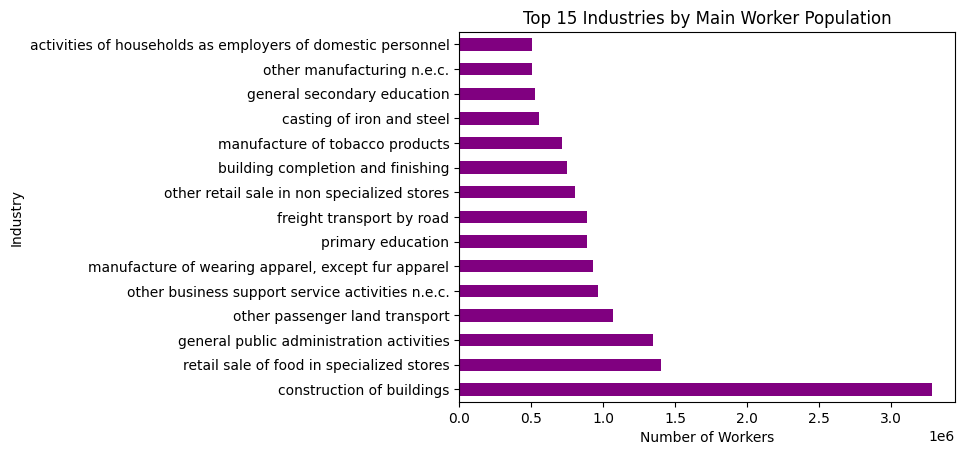

nic_name
construction of buildings                           916226
raising of cattle and buffaloes                     402126
manufacture of tobacco products                     387233
construction of other civil engineering projects    371311
construction roads and railways                     281804
Name: marginal_workers_total_persons, dtype: int64


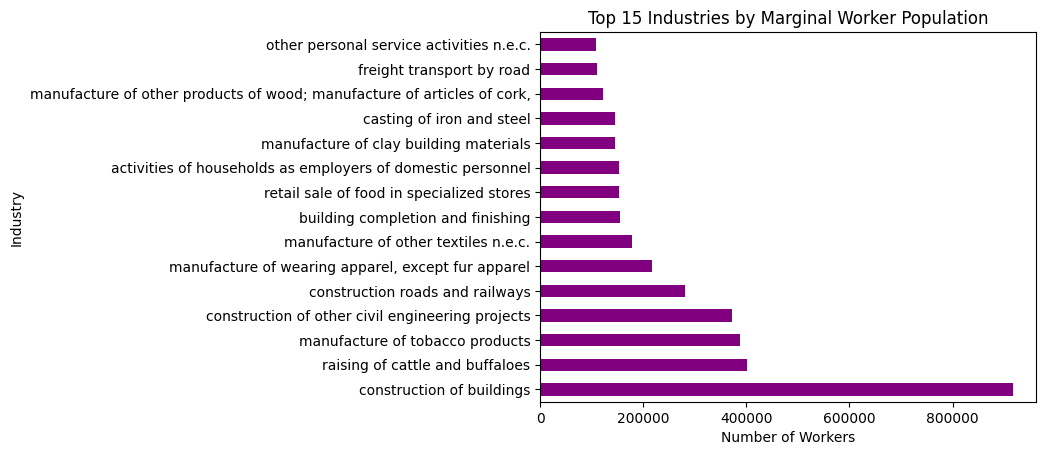

In [718]:
# Main Workers grouped by industry sector (nic_name)
main_sector_workers = eda_df.groupby('nic_name')['main_workers_total_persons'].sum().sort_values(ascending=False).head(15)
print(main_sector_workers.head(5))

# Bar chart of top 15 industries
main_sector_workers.plot(kind='barh', color='purple')
plt.title("Top 15 Industries by Main Worker Population")
plt.xlabel("Number of Workers")
plt.ylabel("Industry")
plt.show()


# Marginal Workers grouped by industry sector (nic_name)
marginal_sector_workers = eda_df.groupby('nic_name')['marginal_workers_total_persons'].sum().sort_values(ascending=False).head(15)
print(marginal_sector_workers.head(5))

# Bar chart of top 15 industries
marginal_sector_workers.plot(kind='barh', color='purple')
plt.title("Top 15 Industries by Marginal Worker Population")
plt.xlabel("Number of Workers")
plt.ylabel("Industry")
plt.show()

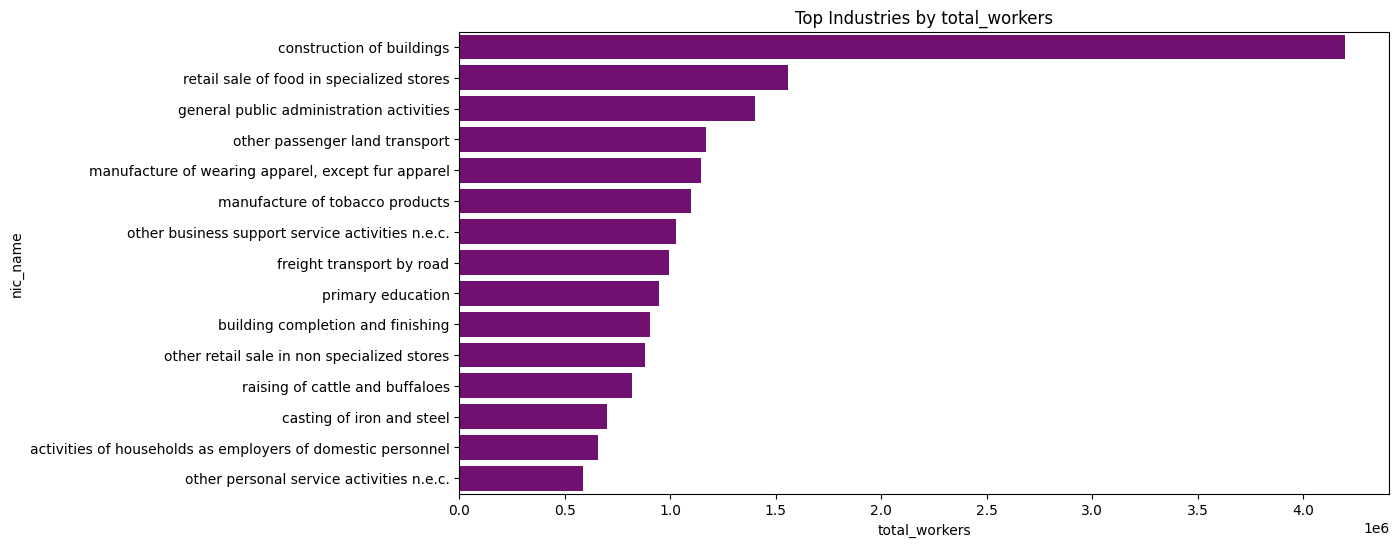

In [719]:
industry_data = eda_df.groupby('nic_name')['total_workers'].sum().reset_index()
industry_data.sort_values('total_workers', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='total_workers', y='nic_name', data=industry_data.head(15), color= 'purple')
plt.title("Top Industries by total_workers")
plt.show()

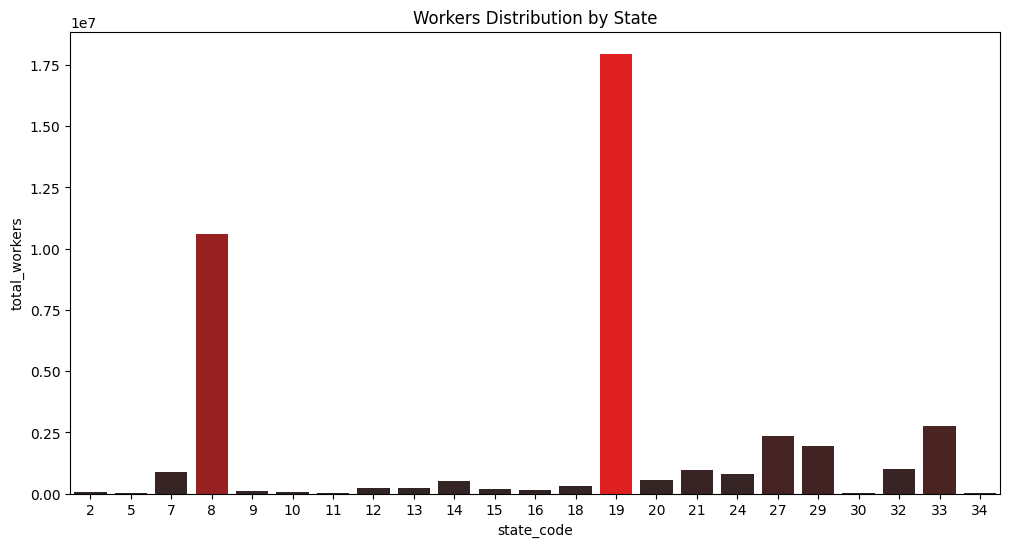

In [741]:
geo_data = eda_df.groupby('state_code')['total_workers'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='state_code', y='total_workers', data=geo_data, hue= 'total_workers', legend= False, palette='dark:red')
plt.title("Workers Distribution by State")
plt.tick_params(axis='x')
plt.show()

main_workers_rural_persons        15307329
main_workers_urban_persons        19446876
marginal_workers_rural_persons     4983579
marginal_workers_urban_persons     2073874
dtype: int64


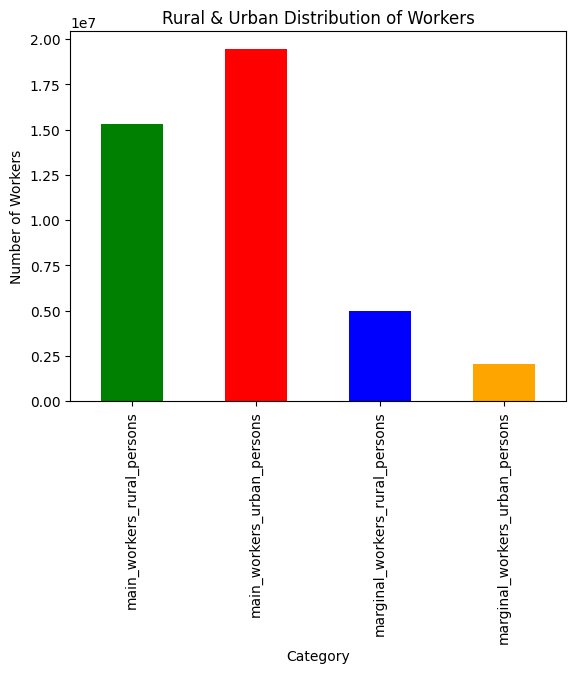

In [721]:
# Workers Rural & Urban distribution
rural_urban_distribution = eda_df[['main_workers_rural_persons', 'main_workers_urban_persons',
                  'marginal_workers_rural_persons', 'marginal_workers_urban_persons']].sum()
print(rural_urban_distribution)

# Bar chart for rural & urban distribution
rural_urban_distribution.plot(kind='bar', color=['green', 'red', "blue", "orange"])
plt.title("Rural & Urban Distribution of Workers")
plt.xlabel("Category")
plt.ylabel("Number of Workers")
plt.show()

main_workers_total_males          28181649
main_workers_total_females         6572556
marginal_workers_total_males       3830569
marginal_workers_total_females     3226884
dtype: int64


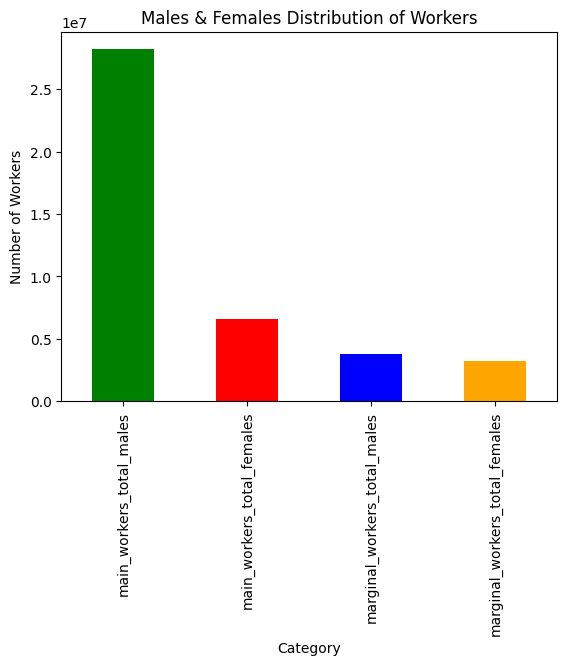

In [722]:
# Males & Females distribution
males_females_distribution = eda_df[['main_workers_total_males', 'main_workers_total_females',
                    'marginal_workers_total_males', 'marginal_workers_total_females']].sum()
print(males_females_distribution)

# Bar chart for Males & Females distribution
males_females_distribution.plot(kind='bar', color=['green', 'red', "blue", "orange"])
plt.title("Males & Females Distribution of Workers")
plt.xlabel("Category")
plt.ylabel("Number of Workers")
plt.show()

### NLP

In [723]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',  max_df=0.85, min_df=2, ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(eda_df['nic_name'])
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 603844 stored elements and shape (89365, 1697)>

### ML (KMeans Clustering)

In [724]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
eda_df['industry_group'] = kmeans.fit_predict(tfidf_matrix)

In [725]:
# Get the feature names (terms)
terms = vectorizer.get_feature_names_out()

# Get the cluster centers (centroids)
centroids = kmeans.cluster_centers_

top_n = 50

# For each cluster, find the top N terms
for i, centroid in enumerate(centroids):
    top_indices = centroid.argsort()[-top_n:][::-1]
    top_terms = [terms[index] for index in top_indices]
    
    print(f"Cluster {i}:")
    print(top_terms)
    print("\n")

Cluster 0:
['activities', 'education', 'service', 'service activities', 'transport', 'construction', 'support', 'wholesale', 'accommodation', 'raising', 'telecommunications', 'passenger', 'telecommunications activities', 'repair', 'growing', 'organizations', 'insurance', 'equipment', 'land', 'support activities', 'mining', 'freight', 'finishing', 'non', 'general', 'printing', 'manufacturing', 'preparation', 'buildings', 'textiles', 'security', 'water', 'social', 'processing', 'waste', 'services', 'collection', 'treatment', 'logging', 'public', 'air', 'land transport', 'passenger land', 'life insurance', 'life', 'quarrying', 'support services', 'related', 'food', 'transportation']


Cluster 1:
['manufacture', 'products', 'articles', 'apparel', 'metal', 'manufacture articles', 'machinery', 'equipment', 'metal products', 'manufacture basic', 'basic', 'containers', 'manufacture footwear', 'fabricated metal', 'fabricated', 'paperboard', 'paper', 'paper paperboard', 'manufacture textiles', '

In [726]:
industry_mapping = {
    0: 'Developmental works',
    1: 'Manufacturing',
    2: 'Automobile Industries',
    3: 'Household works',
    4: 'Retails'
    }
eda_df['industry_group'] = eda_df['industry_group'].map(industry_mapping)

In [727]:
eda_df.to_csv('NLP_df.csv', index=False)